In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlb
import matplotlib.pyplot as plt
mlb.rcParams["figure.figsize"] = (12,6)
mlb.rcParams["axes.axisbelow"] = True


<div style="background-color:#d9f99d; color:#065f46; padding: 10px; border-radius: 5px; font-size: 24px; text-align: center; font-weight: bold;">
  Data Import
</div>

In [343]:
smoke = pd.read_csv("smoking_health_data_final.csv")
smoke

age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
0      54  male            yes          95         110/72           NaN  219.0
1      45  male            yes          64         121/72           NaN  248.0
2      58  male            yes          81       127.5/76           NaN  235.0
3      42  male            yes          90       122.5/80           NaN  225.0
4      42  male            yes          62         119/80           NaN  226.0
...   ...   ...            ...         ...            ...           ...    ...
3895   37  male            yes          88     122.5/82.5          60.0  254.0
3896   49  male            yes          70         123/75          60.0  213.0
3897   56  male            yes          70         125/79          60.0  246.0
3898   50  male            yes          85         134/95          60.0  340.0
3899   40  male            yes          98         132/86          70.0  210.0

[3900 rows x 7 columns]

<div style="background-color:#d9f99d; color:#065f46; padding: 10px; border-radius: 5px; font-size: 24px; text-align: center; font-weight: bold;">
Data Cleaning
</div>

In [344]:
# Checking the data for null
smoke.isna().sum()

age                0
sex                0
current_smoker     0
heart_rate         0
blood_pressure     0
cigs_per_day      14
chol               7
dtype: int64

In [345]:
# since the null data pretty low, it is safe to remove
smoke.dropna(inplace=True)

In [346]:
# now the data frame contain no empty data
smoke.isna().sum()

age               0
sex               0
current_smoker    0
heart_rate        0
blood_pressure    0
cigs_per_day      0
chol              0
dtype: int64

In [347]:
# let's check the column type
smoke.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 14 to 3899
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3879 non-null   int64  
 1   sex             3879 non-null   object 
 2   current_smoker  3879 non-null   object 
 3   heart_rate      3879 non-null   int64  
 4   blood_pressure  3879 non-null   object 
 5   cigs_per_day    3879 non-null   float64
 6   chol            3879 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 242.4+ KB


In [348]:
# now lets split the blood pressure column and remove the blood pressure 
smoke[["systolic","diastolic"]] = smoke["blood_pressure"].str.split("/", expand=True)
smoke.drop(["blood_pressure"], axis=1, inplace=True)
smoke["systolic"] = pd.to_numeric(smoke["systolic"], errors="coerce")
smoke["diastolic"] = pd.to_numeric(smoke["diastolic"], errors="coerce")

In [349]:
smoke

age     sex current_smoker  heart_rate  cigs_per_day   chol  systolic  \
14     48    male             no          75           0.0  175.0     131.0   
15     58  female             no          75           0.0  240.0     126.0   
16     46  female             no          80           0.0  199.0     102.0   
17     45  female             no          75           0.0  235.0     106.0   
18     37  female             no          81           0.0  300.0     112.0   
...   ...     ...            ...         ...           ...    ...       ...   
3895   37    male            yes          88          60.0  254.0     122.5   
3896   49    male            yes          70          60.0  213.0     123.0   
3897   56    male            yes          70          60.0  246.0     125.0   
3898   50    male            yes          85          60.0  340.0     134.0   
3899   40    male            yes          98          70.0  210.0     132.0   

      diastolic  
14         52.0  
15         52.0  
16         56.0  
17         58.0  
18         60.0  
...         ...  
3895       82.5  
3896       75.0  
3897       79.0  
3898       95.0  
3899       86.0  

[3879 rows x 8 columns]

In [350]:
# sex, current smoker are both non ordinal data, and blood pressure just numberic data divided by slash "/"
# now lets check for outlier
smoke.describe()

age   heart_rate  cigs_per_day         chol     systolic  \
count  3879.000000  3879.000000   3879.000000  3879.000000  3879.000000   
mean     49.543181    75.699149      9.163702   236.629286   132.422789   
std       8.565955    12.023013     12.035201    44.413846    22.009103   
min      32.000000    44.000000      0.000000   113.000000    83.500000   
25%      42.000000    68.000000      0.000000   206.000000   117.000000   
50%      49.000000    75.000000      0.000000   234.000000   128.000000   
75%      56.000000    82.000000     20.000000   263.000000   144.000000   
max      70.000000   143.000000     70.000000   696.000000   295.000000   

         diastolic  
count  3879.000000  
mean     82.992782  
std      11.927810  
min      48.000000  
25%      75.000000  
50%      82.000000  
75%      90.000000  
max     142.500000

In [351]:
# the data spread seems having some outlier, lest visualize the outlier
# now let's make a function to visualize each numeric data 
def showOutliers(df, cols):
    plt.figure(figsize=(21, len(cols)*3))
    for i,col in enumerate(cols):
        plt.subplot(len(cols), 1, i+1)
        sns.boxplot(x=df[col], color="#065f46")
        plt.title(col)
    plt.tight_layout()
    plt.show()

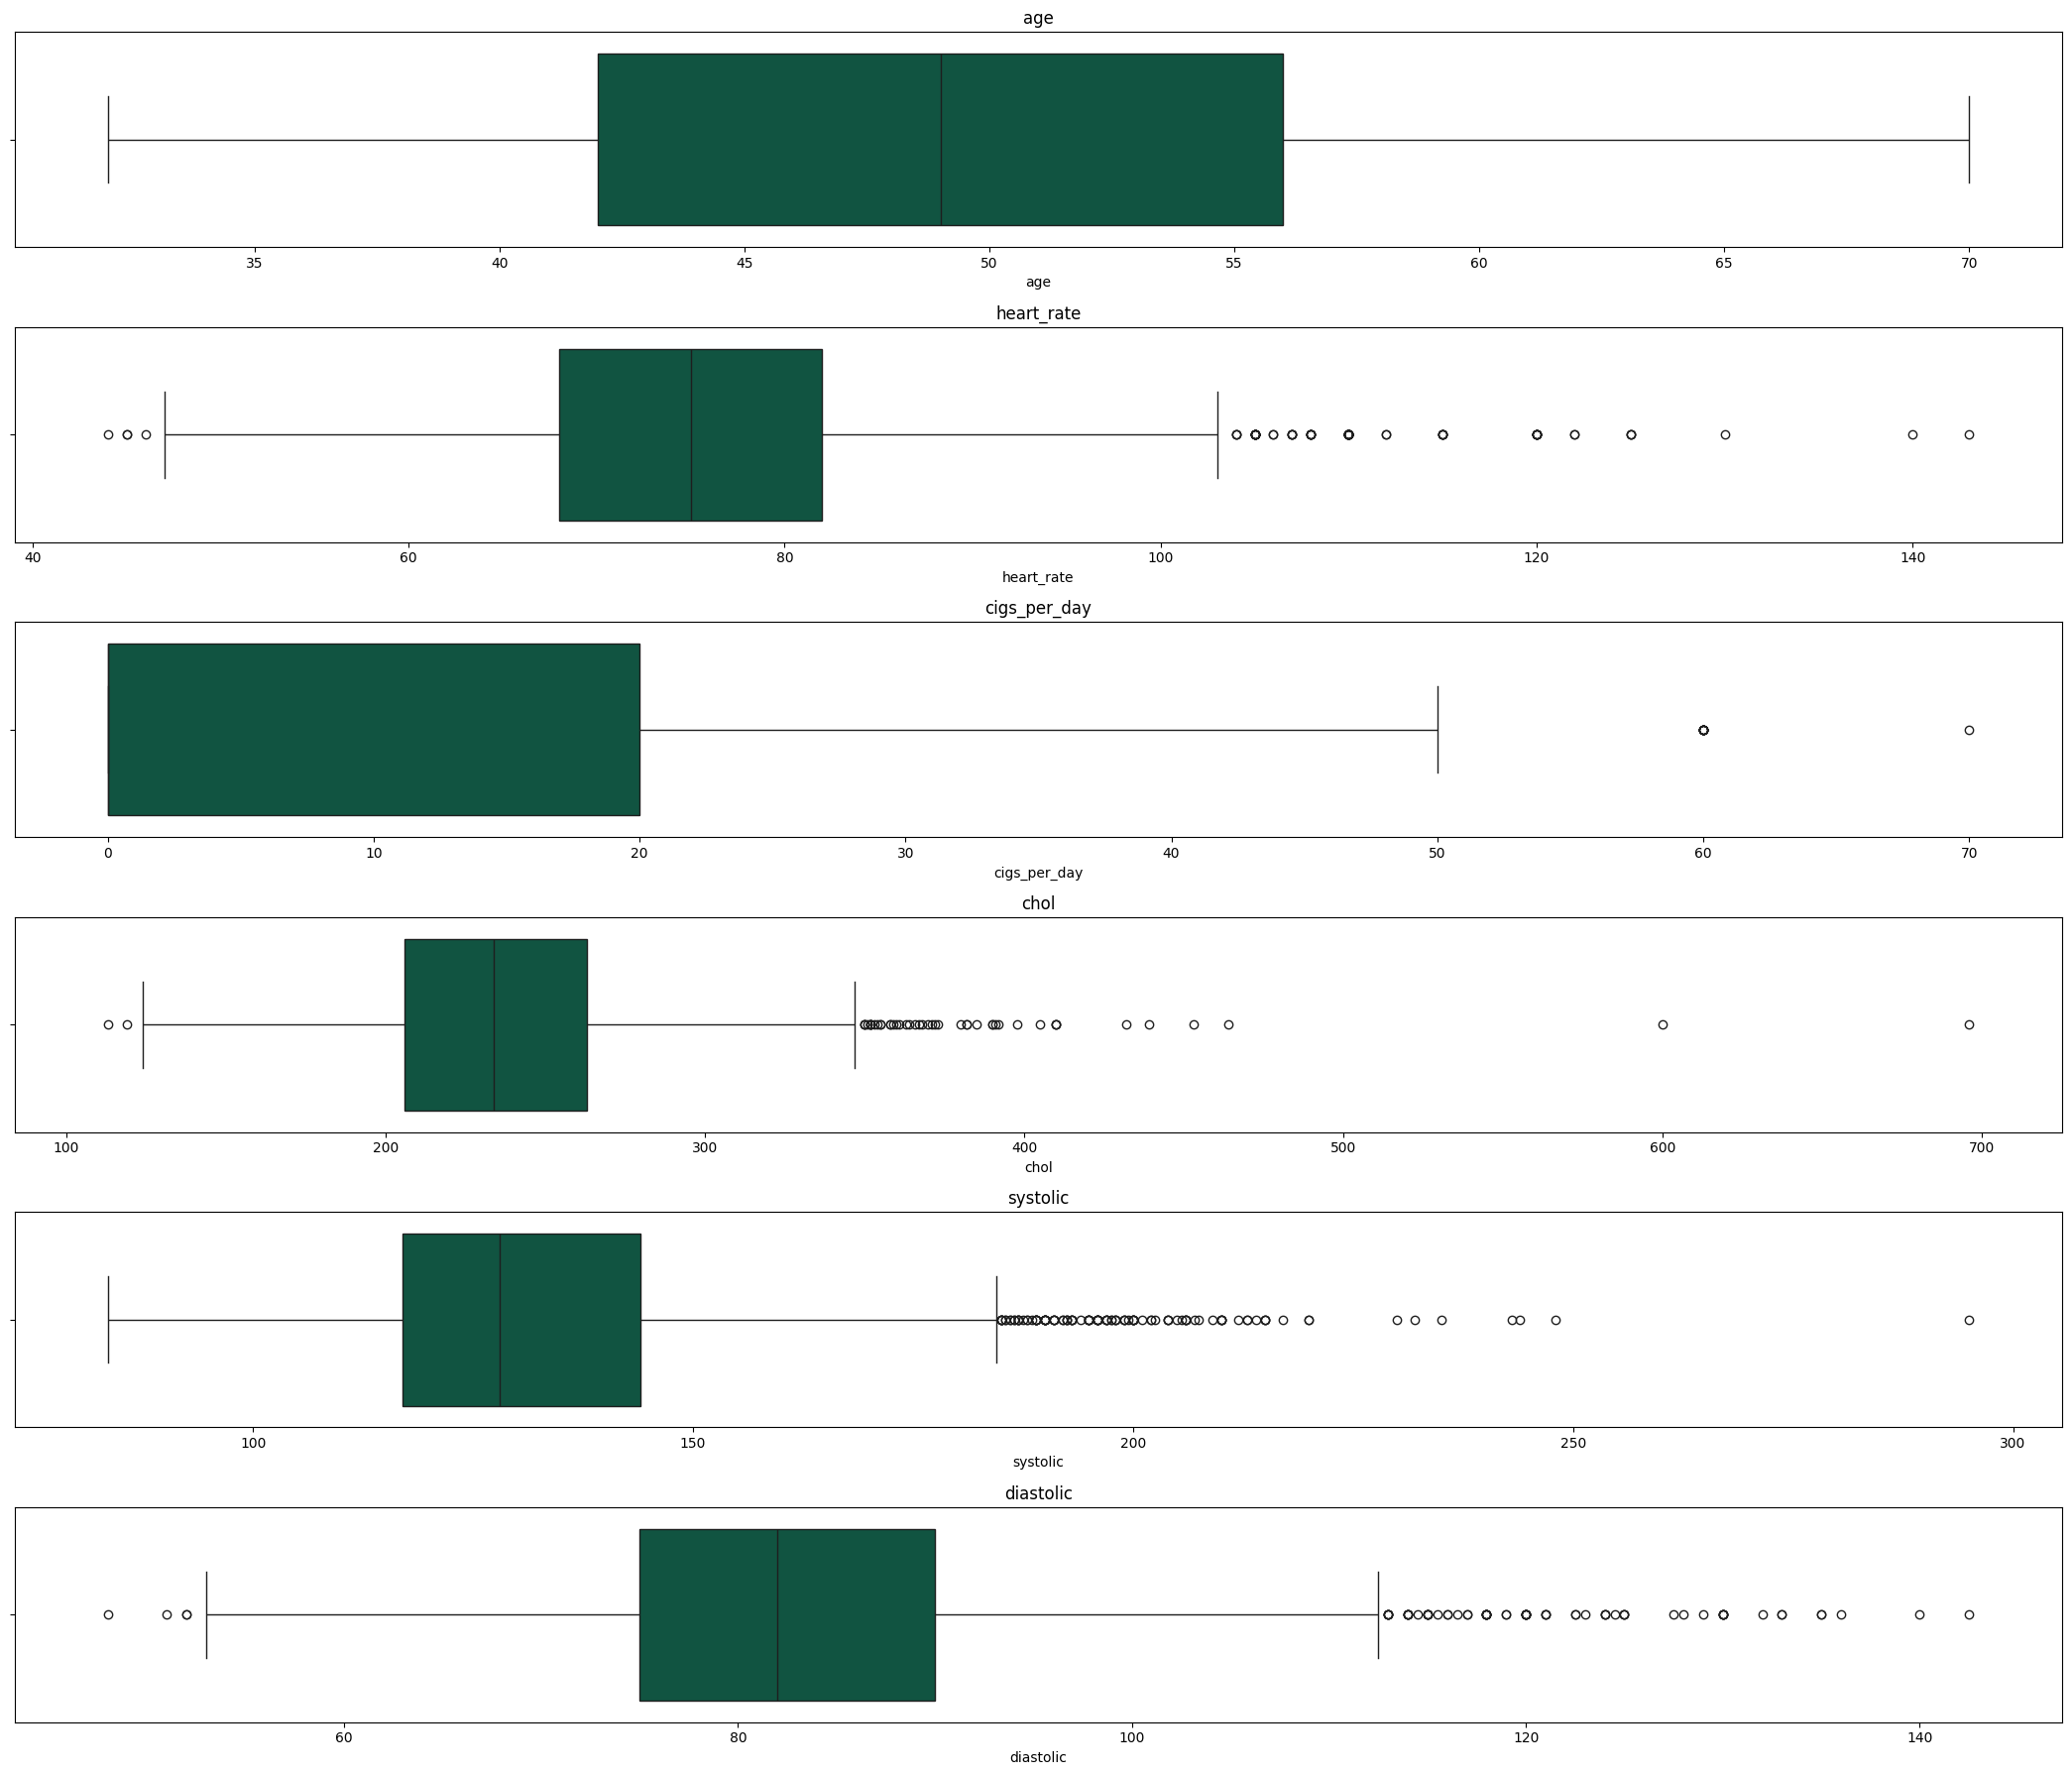

In [352]:
cols = ['age', 'heart_rate', 'cigs_per_day', 'chol','systolic', 'diastolic']
showOutliers(smoke, cols)

In [353]:
# as we can see, theres so much outliers especially in Chol and Systolic
# lets make a function to reduce the outliers using IQR
def reduceOutliers(df, cols):
    for col in cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        df = df[(df[col] >= q1 - 1.5 * iqr)&(df[col] <= q3 + 1.5 * iqr)]
    return df

In [354]:
smoke2 = reduceOutliers(smoke, cols)

In [355]:
smoke2
# as we can see, the data have been reduced from 3879 to 3587, removing 292 outlier row

age     sex current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46  female             no          80           0.0  199.0     102.0   
17     45  female             no          75           0.0  235.0     106.0   
18     37  female             no          81           0.0  300.0     112.0   
19     46  female             no          60           0.0  232.0      90.0   
20     40  female             no          72           0.0  219.0     100.0   
...   ...     ...            ...         ...           ...    ...       ...   
3883   47    male            yes          82          50.0  217.0     145.0   
3884   38    male            yes          70          50.0  300.0     120.0   
3885   51    male            yes          80          50.0  335.0     125.5   
3886   53    male            yes          72          50.0  306.0     127.0   
3887   49    male            yes          70          50.0  252.0     156.0   

      diastolic  
16         56.0  
17         58.0  
18         60.0  
19         60.0  
20         60.0  
...         ...  
3883       89.0  
3884       74.0  
3885       94.0  
3886       82.5  
3887       91.0  

[3587 rows x 8 columns]

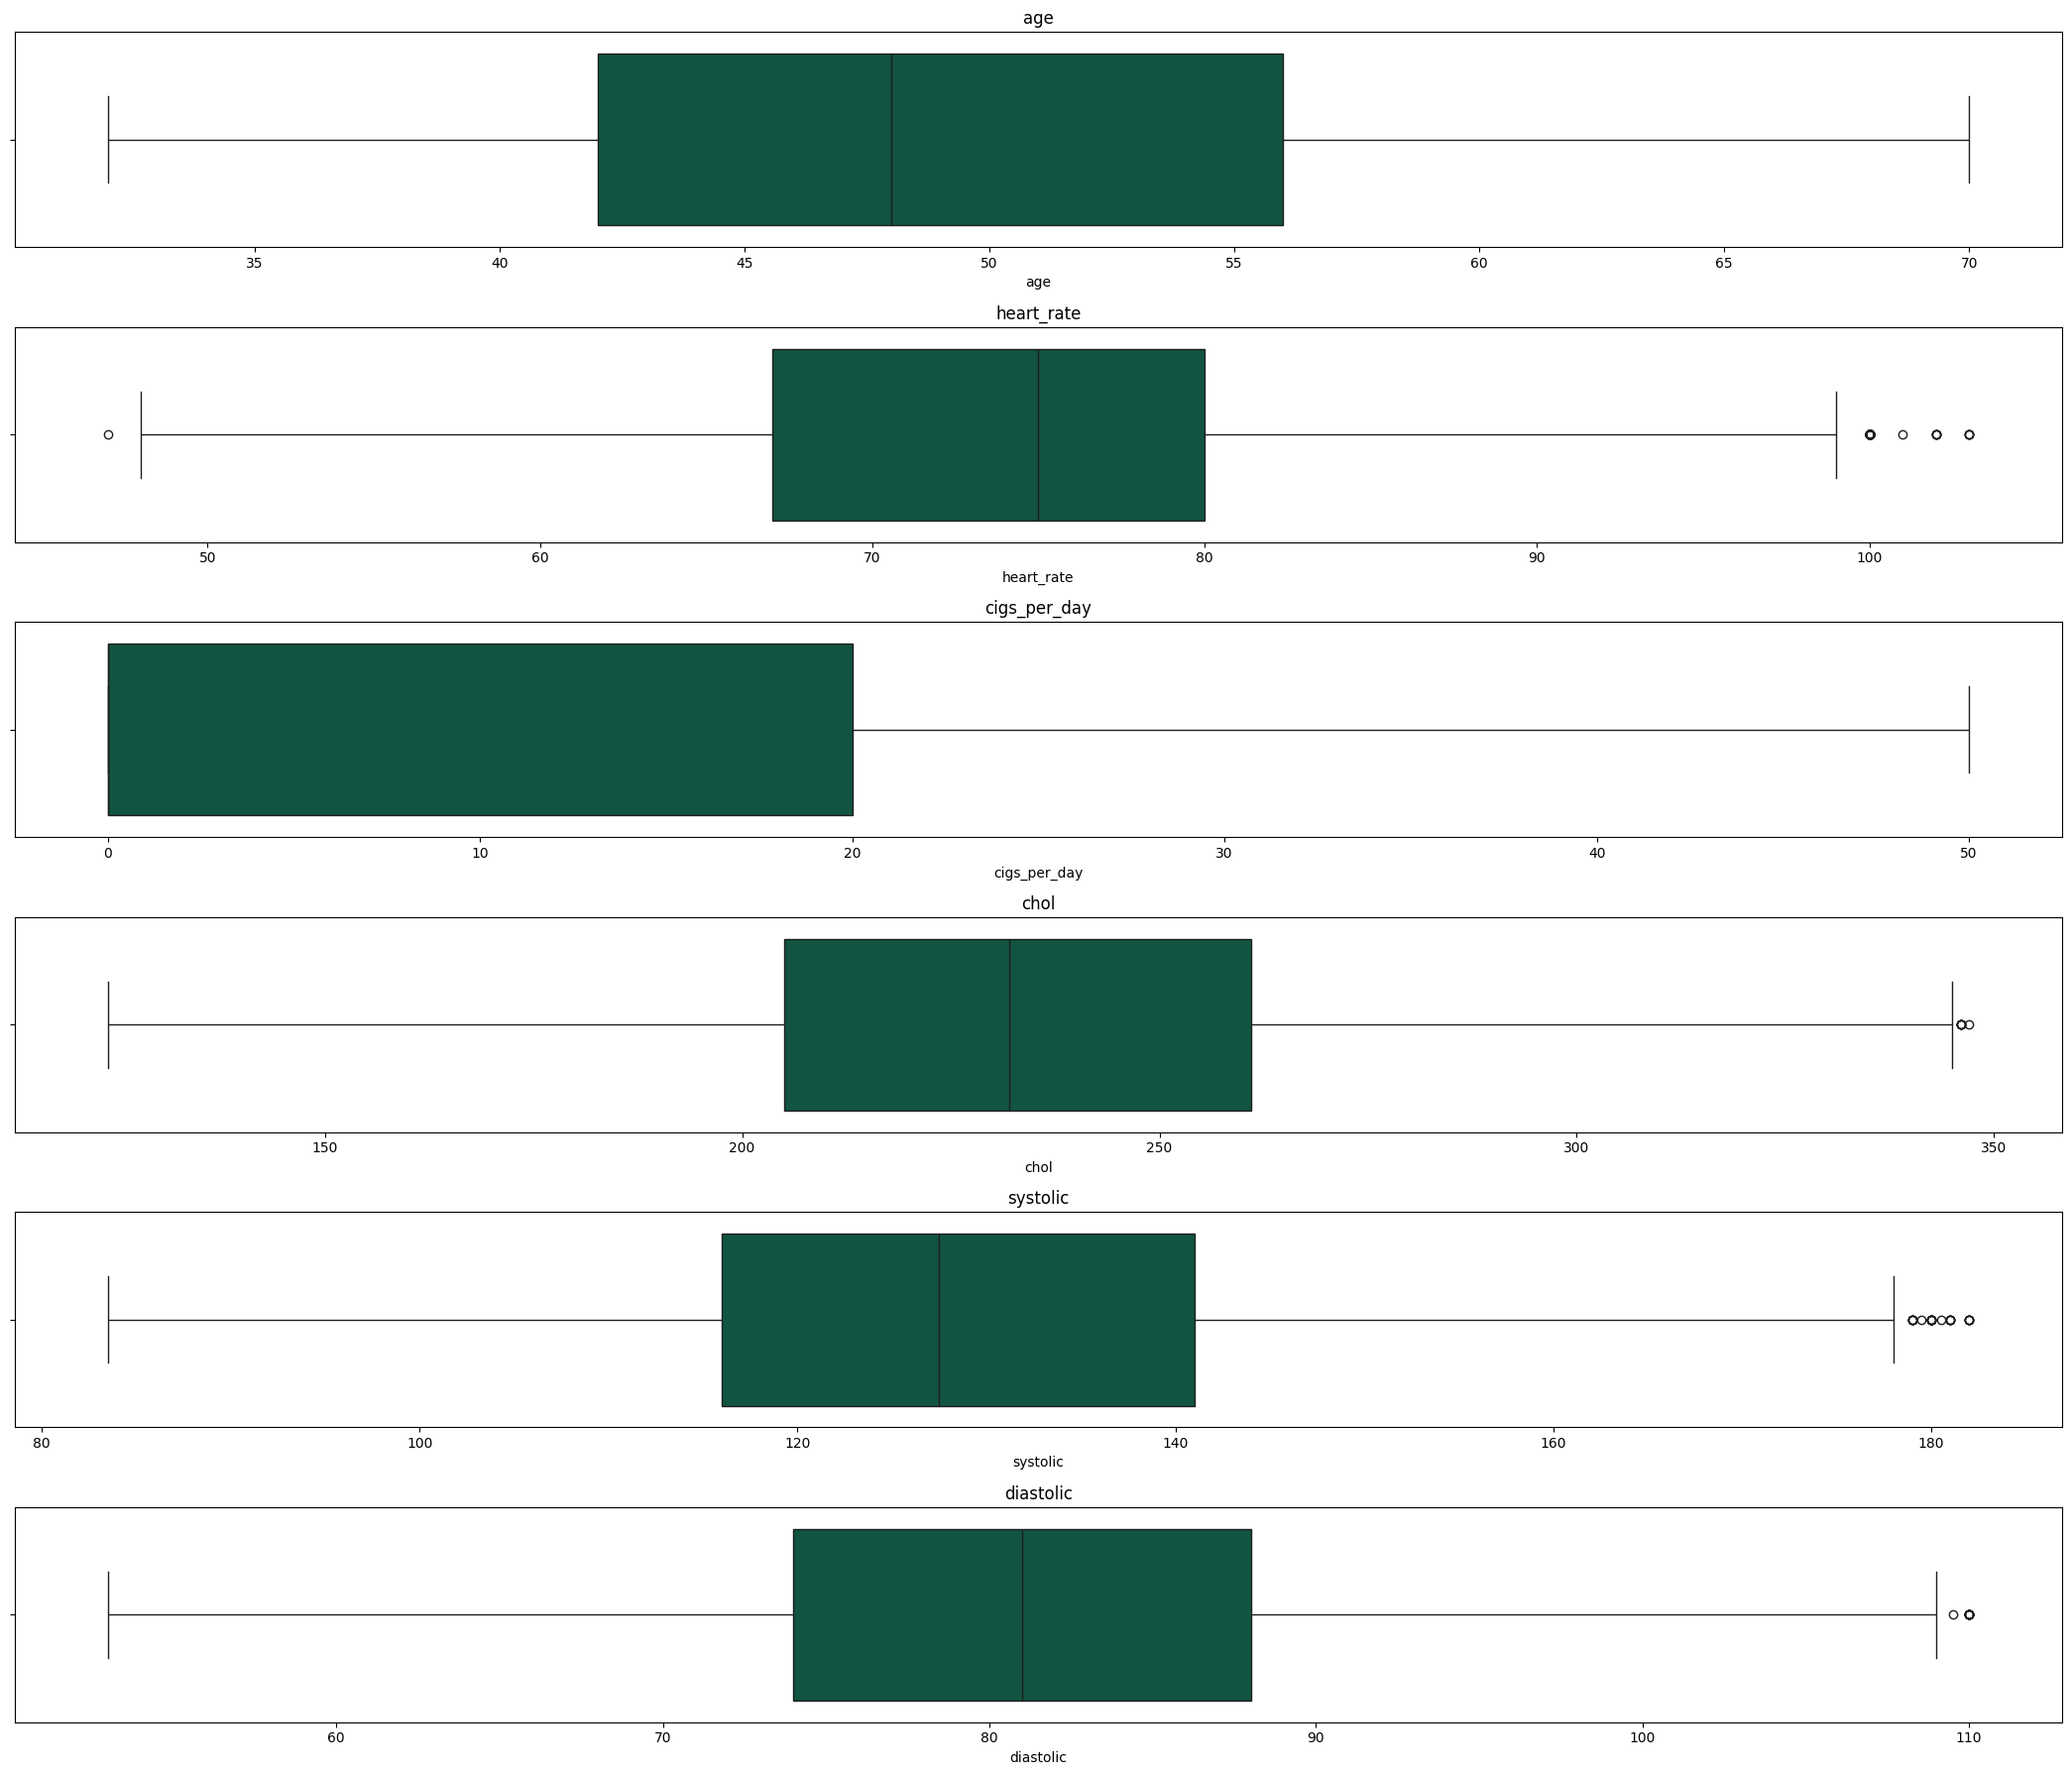

In [356]:
showOutliers(smoke2, cols)

<div style="background-color:#d9f99d; color:#065f46; padding: 10px; border-radius: 5px; font-size: 24px; text-align: center; font-weight: bold;">
 Feature Engineering
</div>

In [357]:
# Blood Pressure Feature Engineering
df = smoke2.copy()
# **Pulse Pressure
df['Pulse_Pressure'] = df['systolic'] - df['diastolic']


In [358]:
# **Mean Arterial Pressure
df['MAP'] = (1/3 * df['systolic']) + (2/3 * df['diastolic'])

In [359]:
# **Hypertension Classification
def HC(row):
    if row['systolic'] < 120 and row['diastolic'] < 80:
        return 'Normal'
    elif 120 <= row['systolic'] < 130 and row['diastolic'] < 80:
        return 'Elevated'
    elif 130 <= row['systolic'] < 140 or 80 <= row['diastolic'] < 90:
        return 'Stage 1 Hypertension'
    elif row['systolic'] >= 140 or row['diastolic'] >= 90:
        return 'Stage 2 Hypertension'
    else:
        return 'Unknown'

df["hypertension_cat"] = df.apply(HC, axis=1)
    

In [360]:
# age feature engineering
df.age.describe()

count    3587.000000
mean       49.175634
std         8.478037
min        32.000000
25%        42.000000
50%        48.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64

In [361]:
bins = [30, 40, 50, 60, 70, 80]
label = ['Young Adult', 'Middle-Aged', 'Pre-Senior', 'Senior', 'Elderly']
df["age_group"] = pd.cut(df["age"], bins=bins, labels=label, right=False)

In [362]:
df[["heart_rate", "chol"]].describe()

heart_rate         chol
count  3587.000000  3587.000000
mean     74.722609   234.228325
std      10.727744    40.329547
min      47.000000   124.000000
25%      67.000000   205.000000
50%      75.000000   232.000000
75%      80.000000   261.000000
max     103.000000   347.000000

In [363]:
# heart rate feature engineering
bins = [0, 60, 100, 140, 180]
labels = ['Low', 'Normal', 'Elevated', 'High']
df['hr_category'] = pd.cut(df['heart_rate'], bins=bins, labels=labels, right=False)

In [364]:
# feature engineering for cholesterol
def categorize_cholesterol(chol):
    if chol < 200:
        return 'Desirable'
    elif 200 <= chol < 240:
        return 'Borderline High'
    else:
        return 'High'
df["chol_cat"] = df["chol"].apply(categorize_cholesterol)

In [365]:
bins = [-1, 0, 5, 15, 30, 70]  # Bins include -1 for non-smokers
labels = ['Non-Smoker', 'Light Smoker', 'Moderate Smoker', 'Heavy Smoker', 'Very Heavy Smoker']
df["smoker_group"] = pd.cut(df["cigs_per_day"],bins, labels=labels, right=False)

In [366]:
df

age     sex current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46  female             no          80           0.0  199.0     102.0   
17     45  female             no          75           0.0  235.0     106.0   
18     37  female             no          81           0.0  300.0     112.0   
19     46  female             no          60           0.0  232.0      90.0   
20     40  female             no          72           0.0  219.0     100.0   
...   ...     ...            ...         ...           ...    ...       ...   
3883   47    male            yes          82          50.0  217.0     145.0   
3884   38    male            yes          70          50.0  300.0     120.0   
3885   51    male            yes          80          50.0  335.0     125.5   
3886   53    male            yes          72          50.0  306.0     127.0   
3887   49    male            yes          70          50.0  252.0     156.0   

      diastolic  Pulse_Pressure         MAP      hypertension_cat  \
16         56.0            46.0   71.333333                Normal   
17         58.0            48.0   74.000000                Normal   
18         60.0            52.0   77.333333                Normal   
19         60.0            30.0   70.000000                Normal   
20         60.0            40.0   73.333333                Normal   
...         ...             ...         ...                   ...   
3883       89.0            56.0  107.666667  Stage 1 Hypertension   
3884       74.0            46.0   89.333333              Elevated   
3885       94.0            31.5  104.500000  Stage 2 Hypertension   
3886       82.5            44.5   97.333333  Stage 1 Hypertension   
3887       91.0            65.0  112.666667  Stage 2 Hypertension   

        age_group hr_category         chol_cat       smoker_group  
16    Middle-Aged      Normal        Desirable       Light Smoker  
17    Middle-Aged      Normal  Borderline High       Light Smoker  
18    Young Adult      Normal             High       Light Smoker  
19    Middle-Aged      Normal  Borderline High       Light Smoker  
20    Middle-Aged      Normal  Borderline High       Light Smoker  
...           ...         ...              ...                ...  
3883  Middle-Aged      Normal  Borderline High  Very Heavy Smoker  
3884  Young Adult      Normal             High  Very Heavy Smoker  
3885   Pre-Senior      Normal             High  Very Heavy Smoker  
3886   Pre-Senior      Normal             High  Very Heavy Smoker  
3887  Middle-Aged      Normal             High  Very Heavy Smoker  

[3587 rows x 15 columns]

<div style="background-color:#d9f99d; color:#065f46; padding: 10px; border-radius: 5px; font-size: 24px; text-align: center; font-weight: bold;">
 Data Analization
</div>

In [367]:
# **Data Corellation
df.corr(numeric_only=True)

age  heart_rate  cigs_per_day      chol  systolic  \
age             1.000000   -0.035672     -0.188916  0.264994  0.353669   
heart_rate     -0.035672    1.000000      0.081667  0.080973  0.146014   
cigs_per_day   -0.188916    0.081667      1.000000 -0.025611 -0.074394   
chol            0.264994    0.080973     -0.025611  1.000000  0.193228   
systolic        0.353669    0.146014     -0.074394  0.193228  1.000000   
diastolic       0.162024    0.158025     -0.048693  0.173214  0.755137   
Pulse_Pressure  0.382922    0.080561     -0.068117  0.137160  0.830032   
MAP             0.267768    0.162681     -0.064683  0.194743  0.927019   

                diastolic  Pulse_Pressure       MAP  
age              0.162024        0.382922  0.267768  
heart_rate       0.158025        0.080561  0.162681  
cigs_per_day    -0.048693       -0.068117 -0.064683  
chol             0.173214        0.137160  0.194743  
systolic         0.755137        0.830032  0.927019  
diastolic        1.000000        0.261167  0.945873  
Pulse_Pressure   0.261167        1.000000  0.560304  
MAP              0.945873        0.560304  1.000000

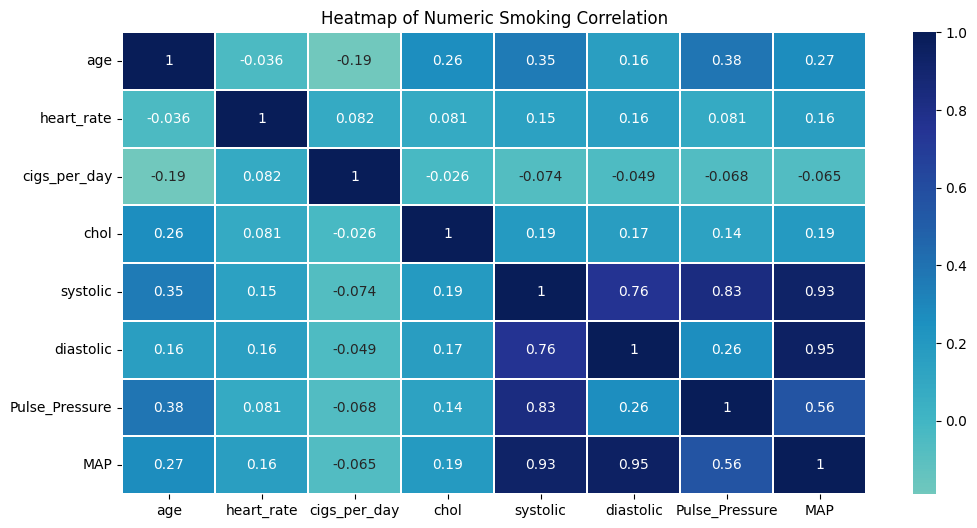

In [368]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", center=0, linewidth=0.1, annot=True)
plt.title("Heatmap of Numeric Smoking Correlation")
plt.show()

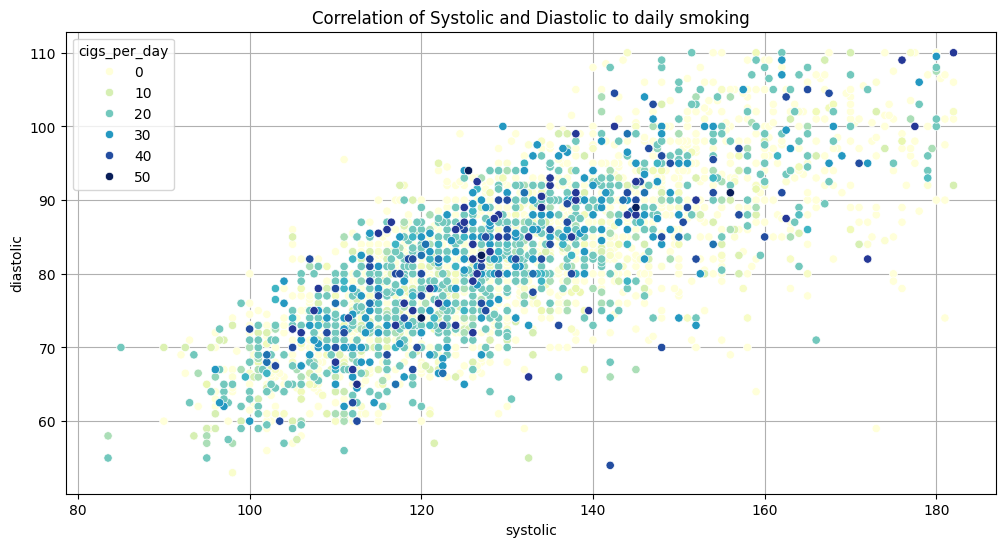

In [369]:
# **blood_pressure have some corelation with age, heart_rate, and cholesterol, but almost no corelation to rate of smoking
sns.scatterplot(df, x="systolic", y="diastolic", hue="cigs_per_day", palette="YlGnBu")
plt.grid()
plt.title("Correlation of Systolic and Diastolic to daily smoking")
plt.show()

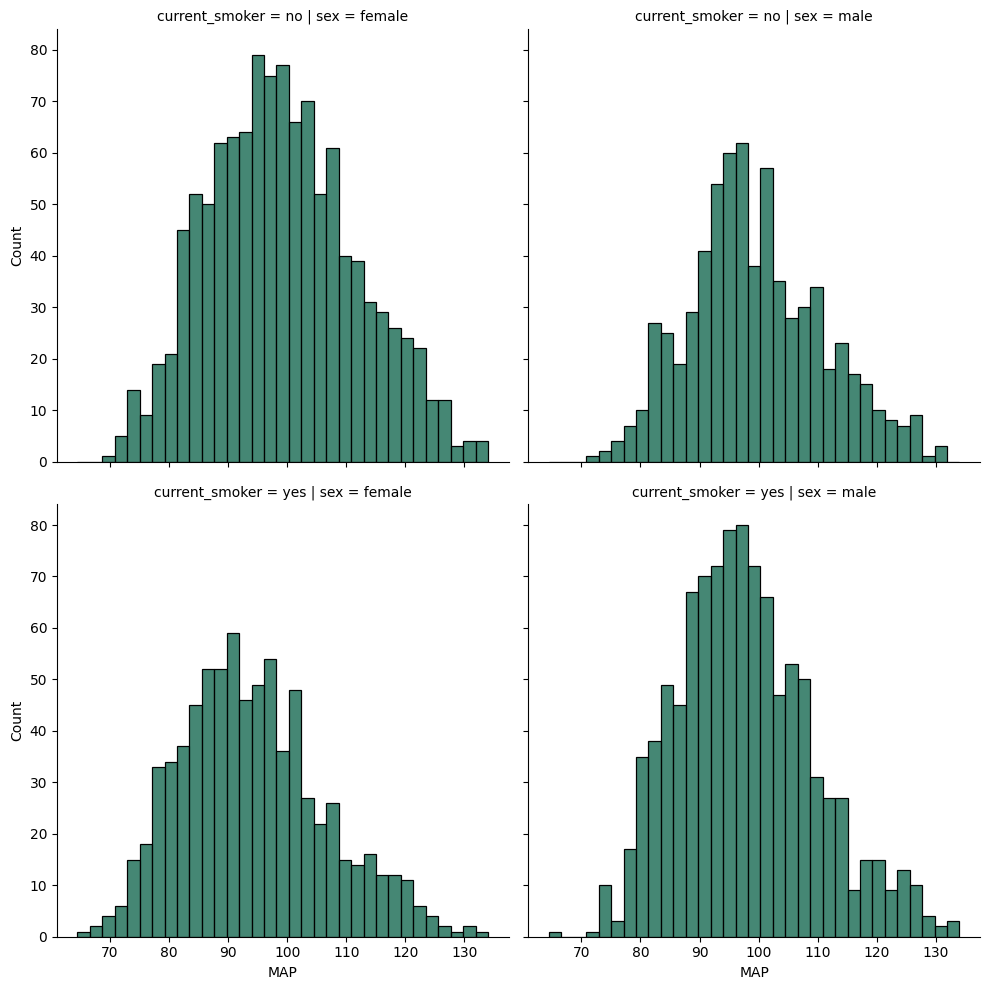

In [370]:
# As we can see, systolic and diastolic (blood pressure) are having positive relation, but it have no corelation to daily smoking rate
sns.displot(df, x="MAP", col="sex", row="current_smoker", color="#065f46")
plt.show()

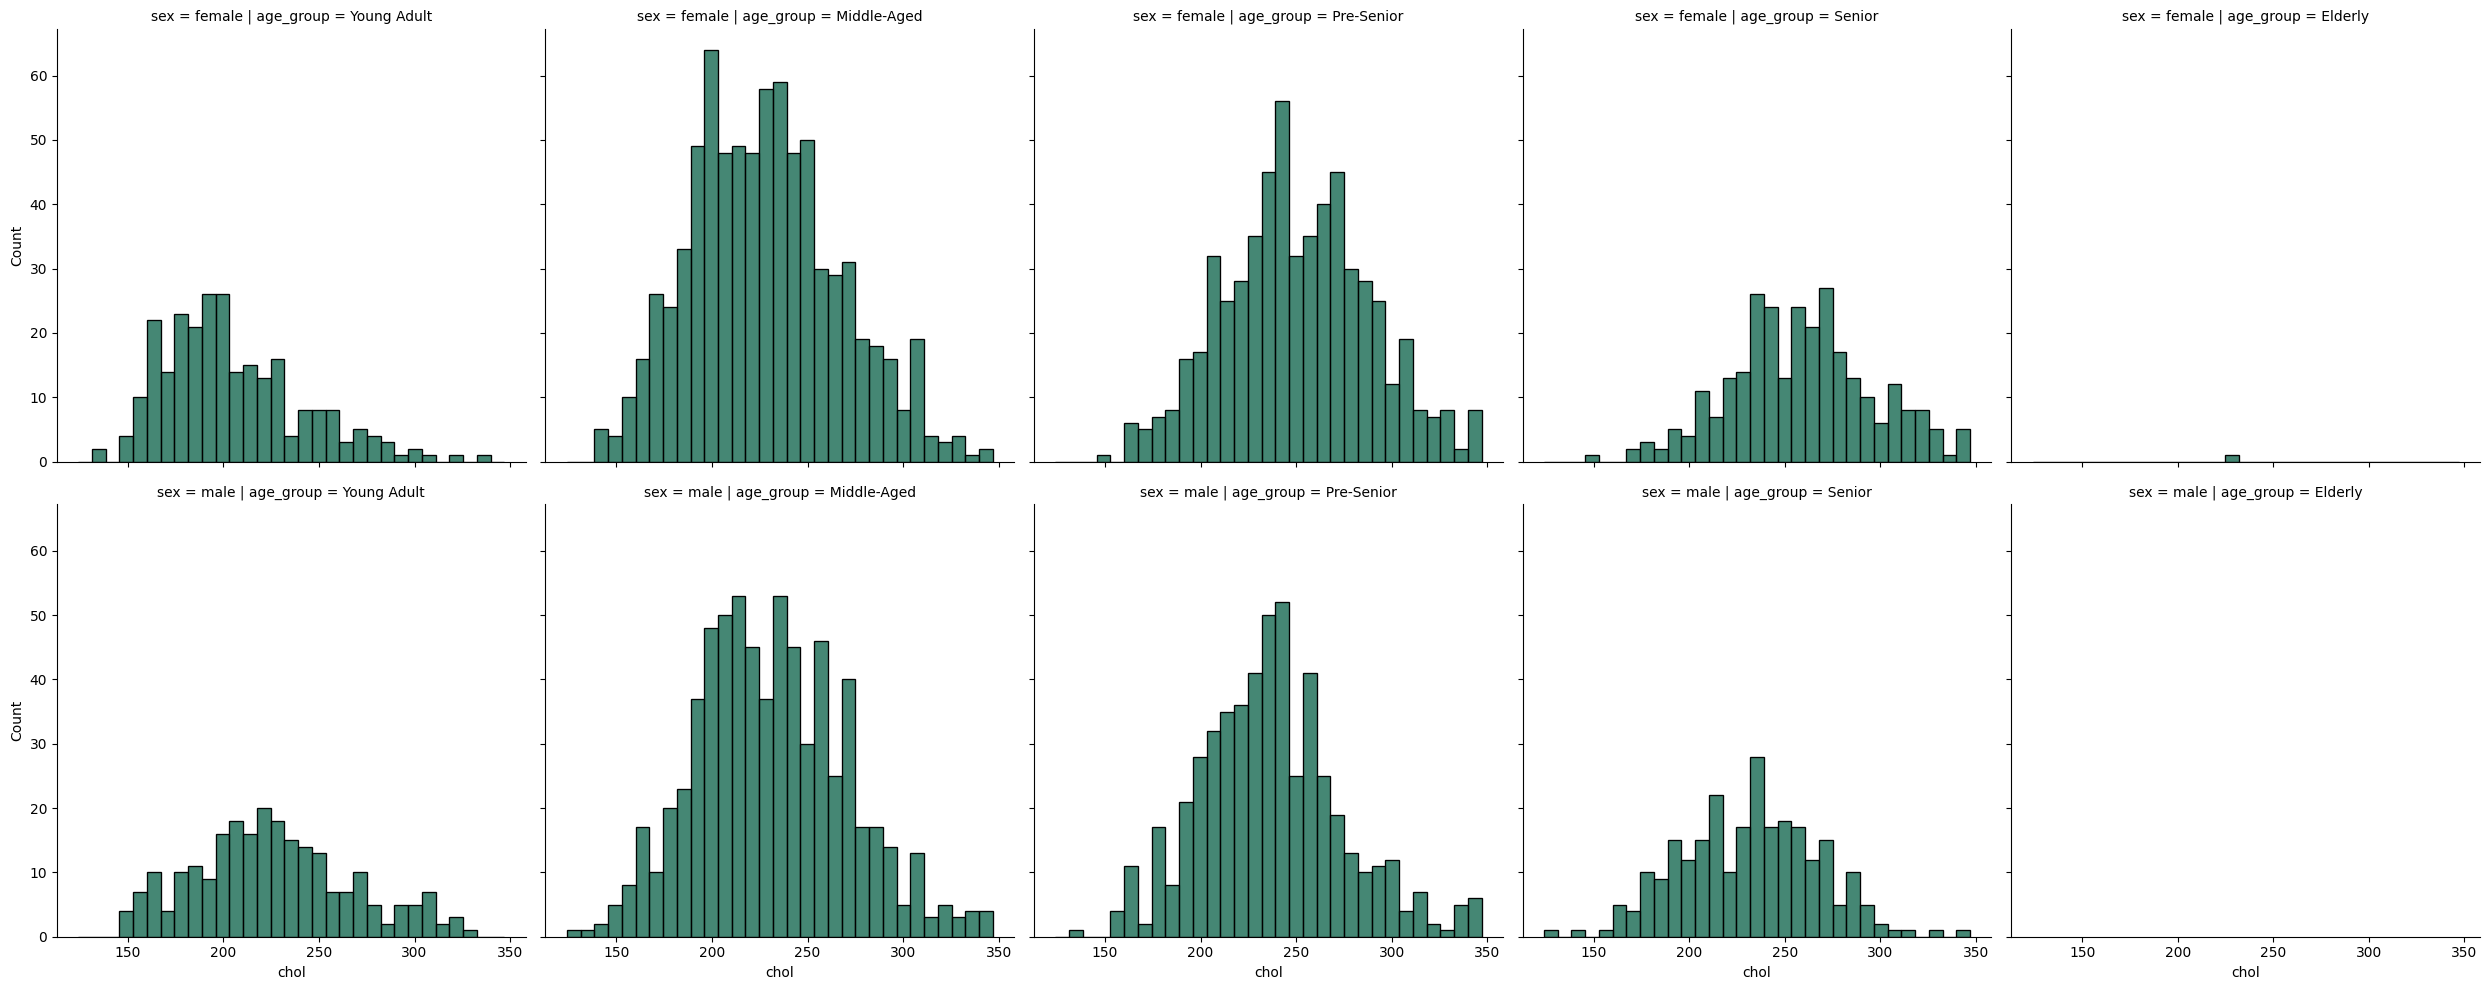

In [371]:
# woman that not smoking have a higher average MAP than the smoking one, and the opposite is happening on male
sns.displot(df, x="chol", col="age_group", row="sex", color="#065f46")
plt.show()

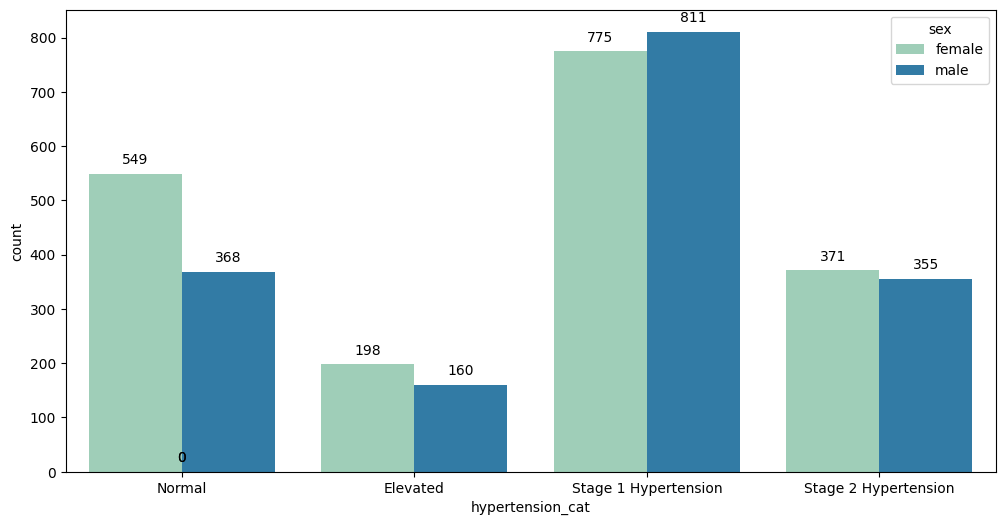

In [372]:
# there's almost the same distribution on both male and female, and both have a highest cholesterol count on middle aged group
gh = sns.countplot(df, x="hypertension_cat", hue="sex", palette="YlGnBu")
for p in gh.patches:
    gh.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, 
                color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

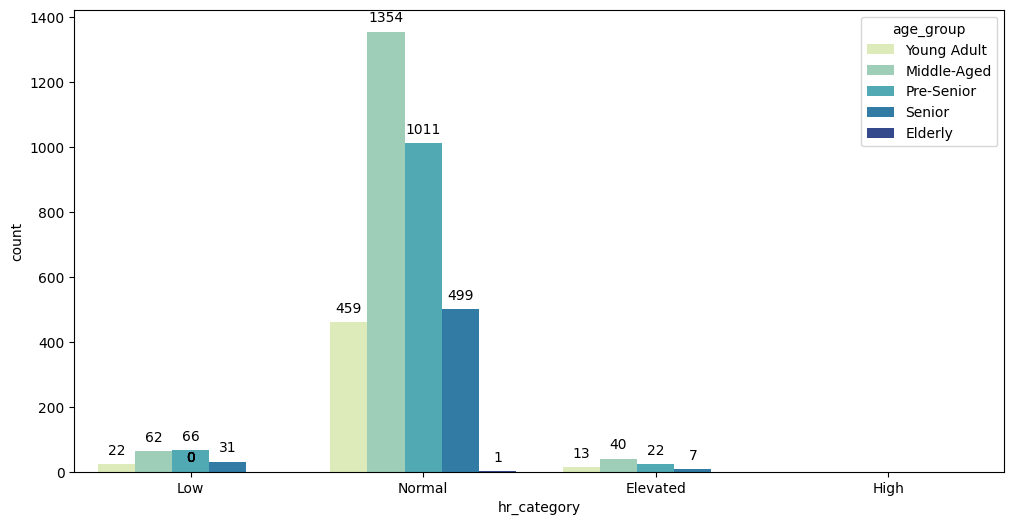

In [373]:
# there are 49% more woman in normal blood pressure, 23% more woman in elevated, 4% in hypertension stage 2, but man have 4% more chance of hypertension stage 1
gh = sns.countplot(df, x="hr_category", hue="age_group", palette="YlGnBu")
for p in gh.patches:
    gh.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, 
                color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

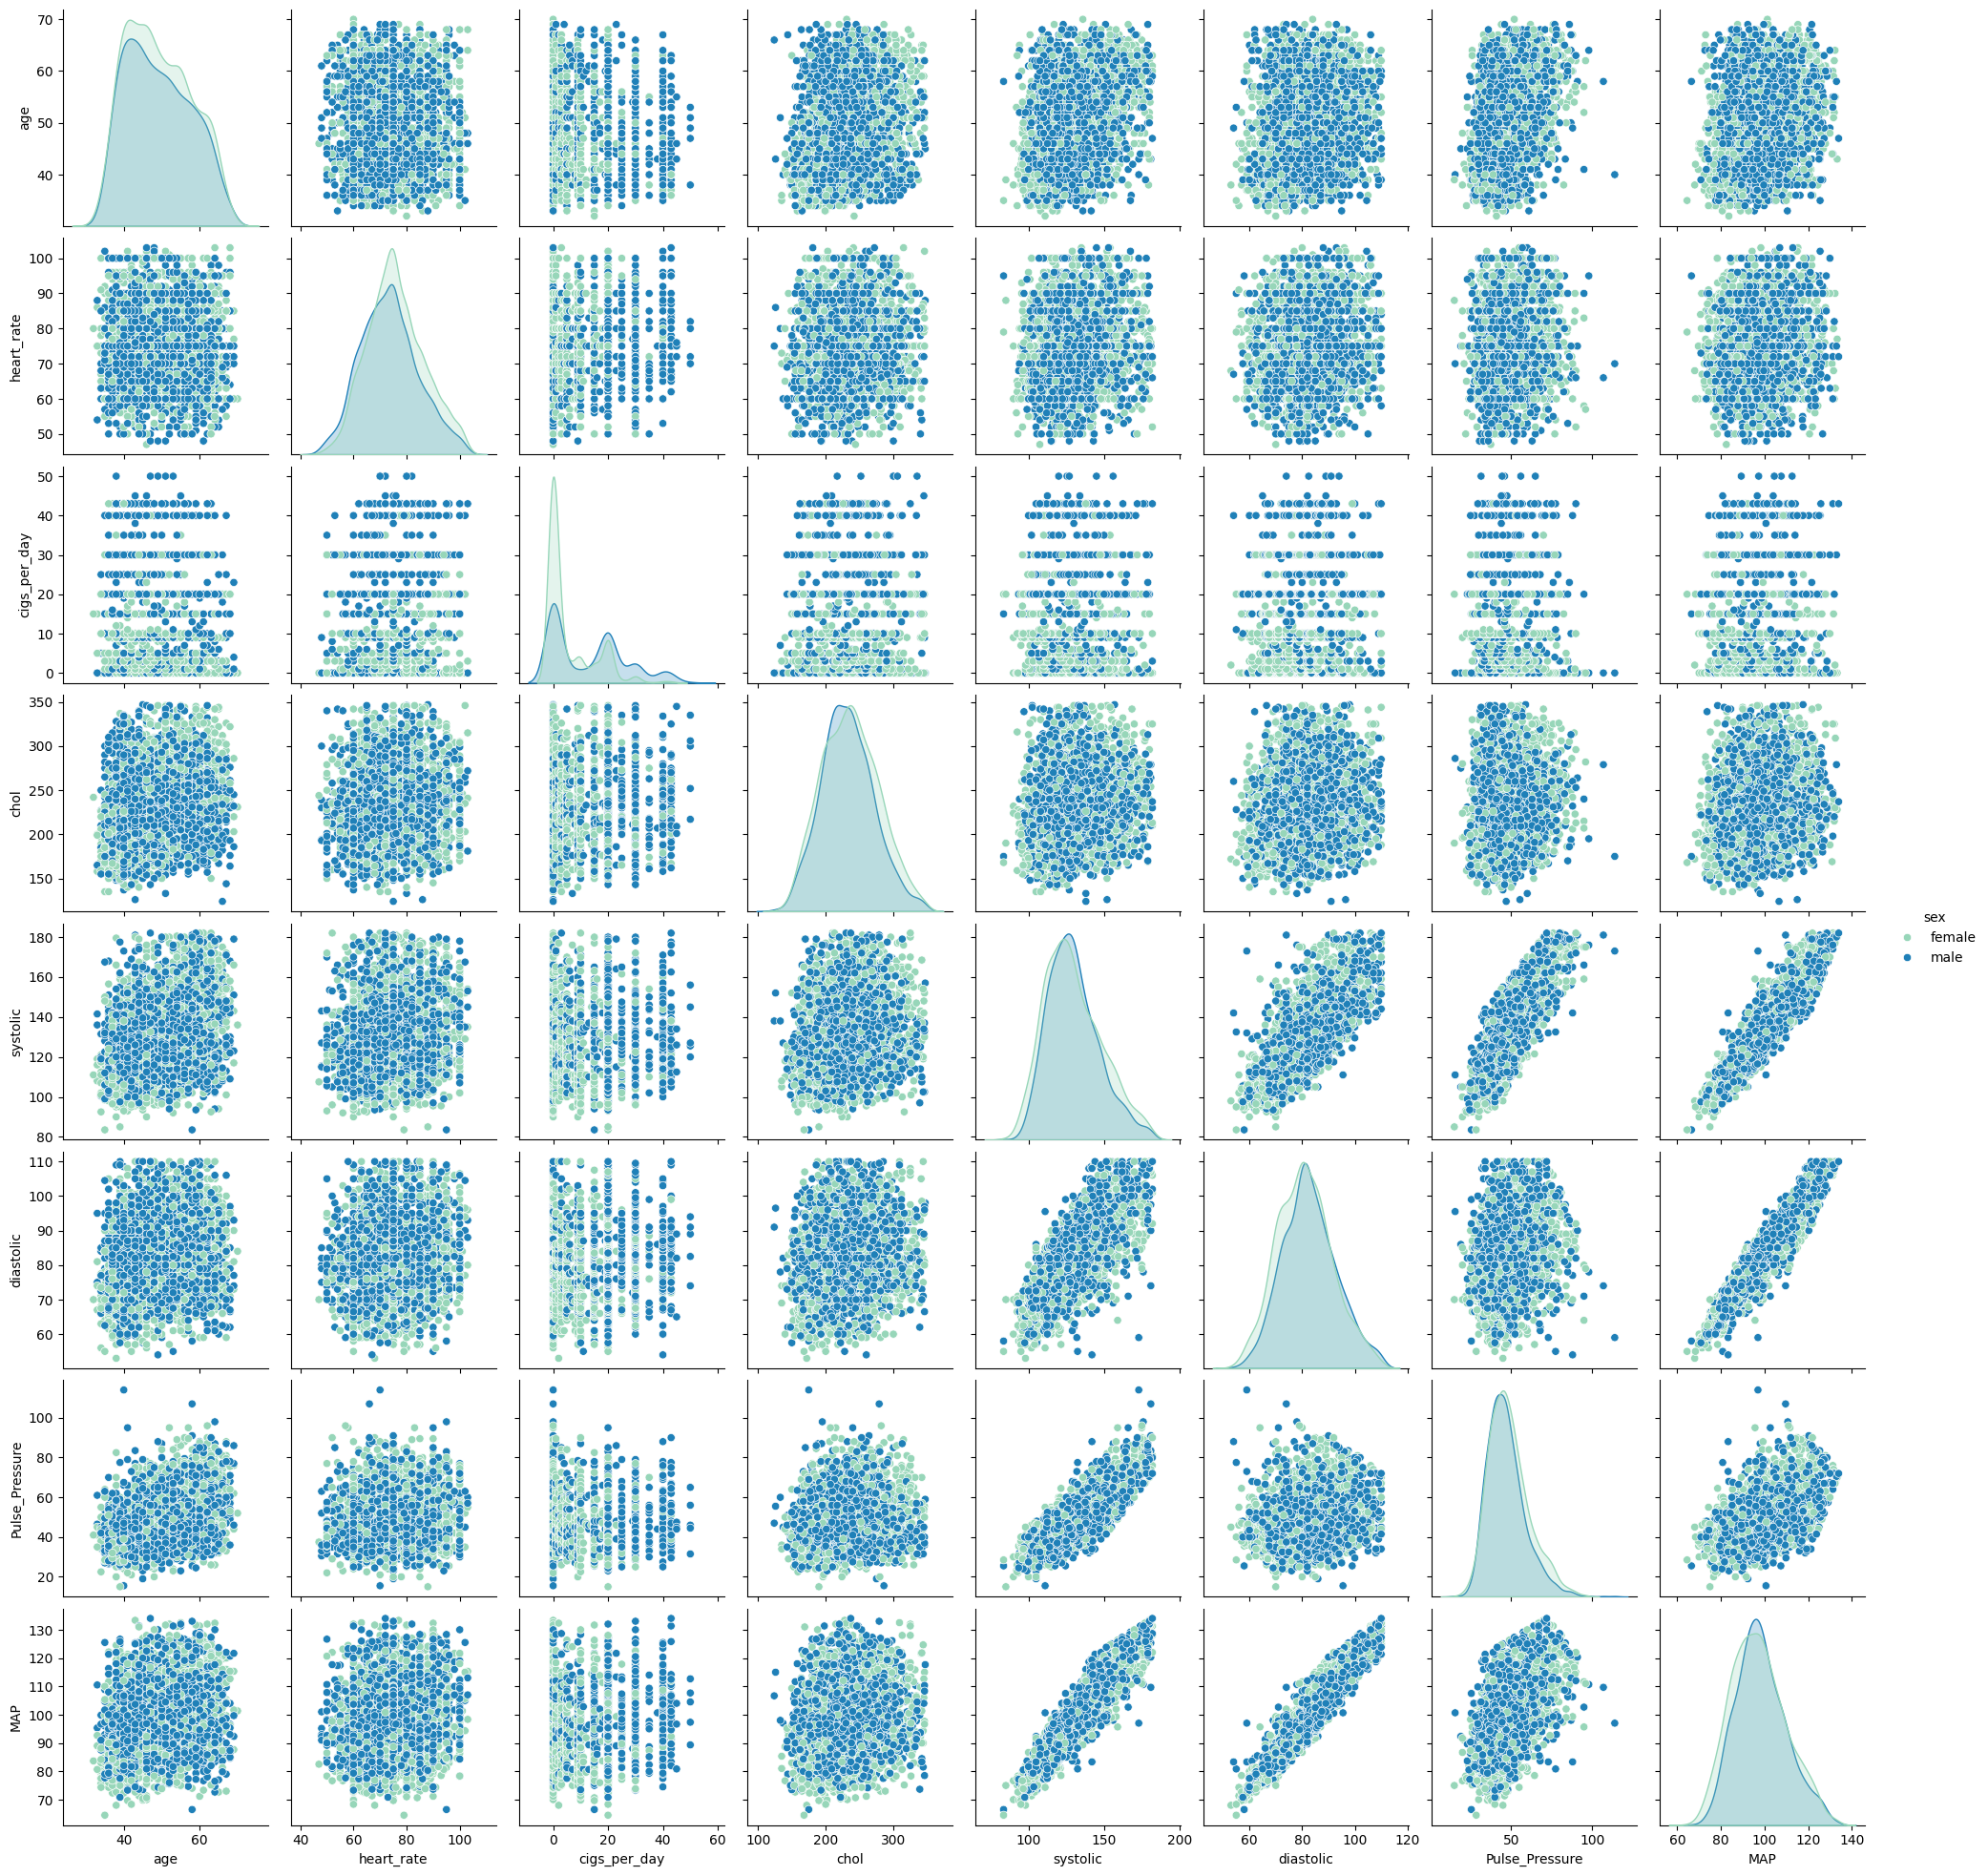

In [374]:
# most of elevated heart rate happened to middle aged person, and the low heart rate on pre_senior and middle aged
# below is data distribution and correlation between sex
sns.pairplot(df, hue="sex", palette="YlGnBu")

<div style="background-color:#d9f99d; color:#065f46; padding: 10px; border-radius: 5px; font-size: 24px; text-align: center; font-weight: bold;">
 Machine Learning And Data Prediction
</div>

In [375]:
df2 = df.copy()

In [376]:
df2

age     sex current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46  female             no          80           0.0  199.0     102.0   
17     45  female             no          75           0.0  235.0     106.0   
18     37  female             no          81           0.0  300.0     112.0   
19     46  female             no          60           0.0  232.0      90.0   
20     40  female             no          72           0.0  219.0     100.0   
...   ...     ...            ...         ...           ...    ...       ...   
3883   47    male            yes          82          50.0  217.0     145.0   
3884   38    male            yes          70          50.0  300.0     120.0   
3885   51    male            yes          80          50.0  335.0     125.5   
3886   53    male            yes          72          50.0  306.0     127.0   
3887   49    male            yes          70          50.0  252.0     156.0   

      diastolic  Pulse_Pressure         MAP      hypertension_cat  \
16         56.0            46.0   71.333333                Normal   
17         58.0            48.0   74.000000                Normal   
18         60.0            52.0   77.333333                Normal   
19         60.0            30.0   70.000000                Normal   
20         60.0            40.0   73.333333                Normal   
...         ...             ...         ...                   ...   
3883       89.0            56.0  107.666667  Stage 1 Hypertension   
3884       74.0            46.0   89.333333              Elevated   
3885       94.0            31.5  104.500000  Stage 2 Hypertension   
3886       82.5            44.5   97.333333  Stage 1 Hypertension   
3887       91.0            65.0  112.666667  Stage 2 Hypertension   

        age_group hr_category         chol_cat       smoker_group  
16    Middle-Aged      Normal        Desirable       Light Smoker  
17    Middle-Aged      Normal  Borderline High       Light Smoker  
18    Young Adult      Normal             High       Light Smoker  
19    Middle-Aged      Normal  Borderline High       Light Smoker  
20    Middle-Aged      Normal  Borderline High       Light Smoker  
...           ...         ...              ...                ...  
3883  Middle-Aged      Normal  Borderline High  Very Heavy Smoker  
3884  Young Adult      Normal             High  Very Heavy Smoker  
3885   Pre-Senior      Normal             High  Very Heavy Smoker  
3886   Pre-Senior      Normal             High  Very Heavy Smoker  
3887  Middle-Aged      Normal             High  Very Heavy Smoker  

[3587 rows x 15 columns]

In [377]:
from sklearn.preprocessing import LabelEncoder

In [378]:
le = LabelEncoder()

In [379]:
#lets transform non-ordinal data into numeric
df2["sex"] = le.fit_transform(df2["sex"])
df2["current_smoker"] = le.fit_transform(df2["current_smoker"])

In [380]:
df2

age  sex  current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46    0               0          80           0.0  199.0     102.0   
17     45    0               0          75           0.0  235.0     106.0   
18     37    0               0          81           0.0  300.0     112.0   
19     46    0               0          60           0.0  232.0      90.0   
20     40    0               0          72           0.0  219.0     100.0   
...   ...  ...             ...         ...           ...    ...       ...   
3883   47    1               1          82          50.0  217.0     145.0   
3884   38    1               1          70          50.0  300.0     120.0   
3885   51    1               1          80          50.0  335.0     125.5   
3886   53    1               1          72          50.0  306.0     127.0   
3887   49    1               1          70          50.0  252.0     156.0   

      diastolic  Pulse_Pressure         MAP      hypertension_cat  \
16         56.0            46.0   71.333333                Normal   
17         58.0            48.0   74.000000                Normal   
18         60.0            52.0   77.333333                Normal   
19         60.0            30.0   70.000000                Normal   
20         60.0            40.0   73.333333                Normal   
...         ...             ...         ...                   ...   
3883       89.0            56.0  107.666667  Stage 1 Hypertension   
3884       74.0            46.0   89.333333              Elevated   
3885       94.0            31.5  104.500000  Stage 2 Hypertension   
3886       82.5            44.5   97.333333  Stage 1 Hypertension   
3887       91.0            65.0  112.666667  Stage 2 Hypertension   

        age_group hr_category         chol_cat       smoker_group  
16    Middle-Aged      Normal        Desirable       Light Smoker  
17    Middle-Aged      Normal  Borderline High       Light Smoker  
18    Young Adult      Normal             High       Light Smoker  
19    Middle-Aged      Normal  Borderline High       Light Smoker  
20    Middle-Aged      Normal  Borderline High       Light Smoker  
...           ...         ...              ...                ...  
3883  Middle-Aged      Normal  Borderline High  Very Heavy Smoker  
3884  Young Adult      Normal             High  Very Heavy Smoker  
3885   Pre-Senior      Normal             High  Very Heavy Smoker  
3886   Pre-Senior      Normal             High  Very Heavy Smoker  
3887  Middle-Aged      Normal             High  Very Heavy Smoker  

[3587 rows x 15 columns]

In [381]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3587 entries, 16 to 3887
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               3587 non-null   int64   
 1   sex               3587 non-null   int32   
 2   current_smoker    3587 non-null   int32   
 3   heart_rate        3587 non-null   int64   
 4   cigs_per_day      3587 non-null   float64 
 5   chol              3587 non-null   float64 
 6   systolic          3587 non-null   float64 
 7   diastolic         3587 non-null   float64 
 8   Pulse_Pressure    3587 non-null   float64 
 9   MAP               3587 non-null   float64 
 10  hypertension_cat  3587 non-null   object  
 11  age_group         3587 non-null   category
 12  hr_category       3587 non-null   category
 13  chol_cat          3587 non-null   object  
 14  smoker_group      3587 non-null   category
dtypes: category(3), float64(6), int32(2), int64(2), object(2)
memory usage: 347.

In [382]:
# next transform ordinal data
from sklearn.preprocessing import OrdinalEncoder

In [383]:
# Categorical ranges for OrdinalEncoder
hypertension_range = [['Normal', 'Elevated', 'Stage 1 Hypertension', 'Stage 2 Hypertension']]
age_range = [["Young Adult", "Middle-Aged", "Pre-Senior", "Senior", "Elderly"]]
hr_range = [["Low", "Normal", "Elevated"]]
chol_range = [["Desirable", "Borderline High", "High"]]
smoker_range = [["Non-Smoker", "Light Smoker", "Moderate Smoker", "Heavy Smoker", "Very Heavy Smoker"]]

# Initialize encoders
hc = OrdinalEncoder(categories=hypertension_range)
ar = OrdinalEncoder(categories=age_range)
hr = OrdinalEncoder(categories=hr_range)
cr = OrdinalEncoder(categories=chol_range)
sr = OrdinalEncoder(categories=smoker_range)

# Fit and transform categorical columns
df2["hypertension_cat"] = hc.fit_transform(df2[["hypertension_cat"]])
df2["age_group"] = ar.fit_transform(df2[["age_group"]])
df2["hr_category"] = hr.fit_transform(df2[["hr_category"]])
df2["chol_cat"] = cr.fit_transform(df2[["chol_cat"]])
df2["smoker_group"] = sr.fit_transform(df2[["smoker_group"]])

In [384]:
df2

age  sex  current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46    0               0          80           0.0  199.0     102.0   
17     45    0               0          75           0.0  235.0     106.0   
18     37    0               0          81           0.0  300.0     112.0   
19     46    0               0          60           0.0  232.0      90.0   
20     40    0               0          72           0.0  219.0     100.0   
...   ...  ...             ...         ...           ...    ...       ...   
3883   47    1               1          82          50.0  217.0     145.0   
3884   38    1               1          70          50.0  300.0     120.0   
3885   51    1               1          80          50.0  335.0     125.5   
3886   53    1               1          72          50.0  306.0     127.0   
3887   49    1               1          70          50.0  252.0     156.0   

      diastolic  Pulse_Pressure         MAP  hypertension_cat  age_group  \
16         56.0            46.0   71.333333               0.0        1.0   
17         58.0            48.0   74.000000               0.0        1.0   
18         60.0            52.0   77.333333               0.0        0.0   
19         60.0            30.0   70.000000               0.0        1.0   
20         60.0            40.0   73.333333               0.0        1.0   
...         ...             ...         ...               ...        ...   
3883       89.0            56.0  107.666667               2.0        1.0   
3884       74.0            46.0   89.333333               1.0        0.0   
3885       94.0            31.5  104.500000               3.0        2.0   
3886       82.5            44.5   97.333333               2.0        2.0   
3887       91.0            65.0  112.666667               3.0        1.0   

      hr_category  chol_cat  smoker_group  
16            1.0       0.0           1.0  
17            1.0       1.0           1.0  
18            1.0       2.0           1.0  
19            1.0       1.0           1.0  
20            1.0       1.0           1.0  
...           ...       ...           ...  
3883          1.0       1.0           4.0  
3884          1.0       2.0           4.0  
3885          1.0       2.0           4.0  
3886          1.0       2.0           4.0  
3887          1.0       2.0           4.0  

[3587 rows x 15 columns]

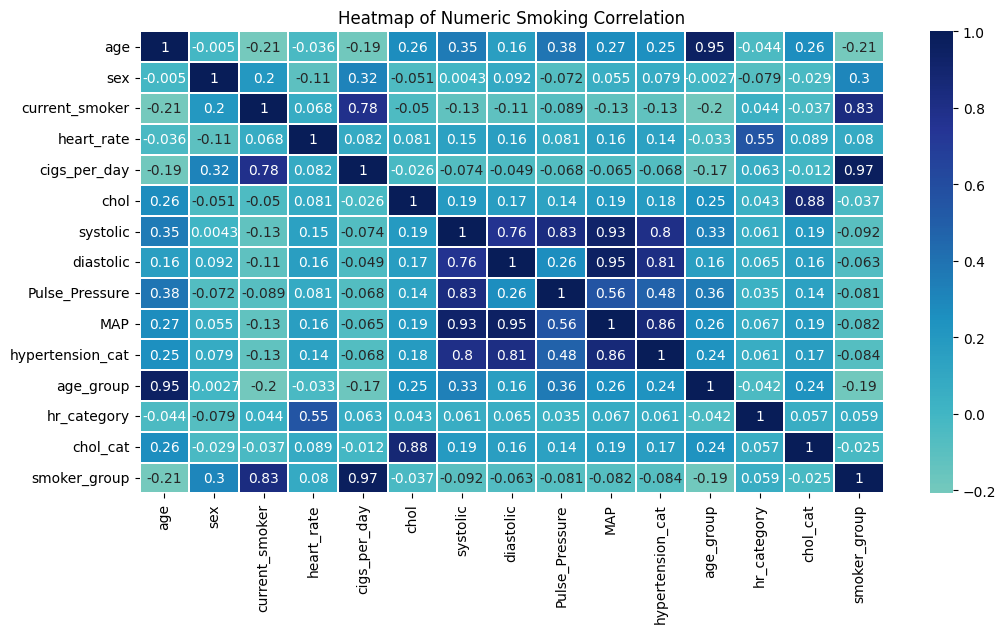

In [386]:
# now lets check the correlation between the data to predict cigs_per_day
sns.heatmap(df2.corr(numeric_only=True), cmap="YlGnBu", center=0, linewidth=0.1, annot=True)
plt.title("Heatmap of Numeric Smoking Correlation")
plt.show()

In [387]:
# as we can see here, data like age, sex, current smoker, age group, and smoker group have a strong relation to predict smoking per day data
# now lets split the data in to x and y, with x is the non-target data, and y is the target data
x = df2.drop(["cigs_per_day"], axis=1)
y = df2[["cigs_per_day"]]

In [389]:
# now lets split the data further into train and test data
from sklearn.model_selection import train_test_split

In [390]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [396]:
# first lets use decision tree
from sklearn.tree import DecisionTreeClassifier

In [397]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [398]:
tree.score(x_test, y_test)

0.7116991643454039

In [399]:
# we get 71% correct using decision tree, but we can do better with random forest
from sklearn.ensemble import RandomForestClassifier

In [400]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [401]:
forest.score(x_test, y_test)

0.7632311977715878

In [402]:
from sklearn.linear_model import LinearRegression

In [403]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [404]:
reg.score(x_test, y_test)

0.9477769344503103

In [405]:
from sklearn.ensemble import RandomForestRegressor

In [406]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)

C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [407]:
forest.score(x_test, y_test)

0.9575668670302673

In [408]:
# as we can see, dandome forest regresor is the highest score with 965 correct, but we can still push it for a better result
from sklearn.model_selection import GridSearchCV

In [411]:
param_grid = {
    "n_estimators" : [500, 800, 1000],
    "max_features" : [8, 10, 12]
}
grid = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)
grid.fit(x_train, y_train)

C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\wirin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 10, 12],
                         'n_estimators': [500, 800, 1000]},
             return_train_score=True)

In [412]:
grid.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=800)

In [413]:
pred = grid.best_estimator_
pred.score(x_test, y_test)

0.9588259090226967

In [414]:
df2["smoking_pred"] = pred.predict(x)

In [415]:
df2

age  sex  current_smoker  heart_rate  cigs_per_day   chol  systolic  \
16     46    0               0          80           0.0  199.0     102.0   
17     45    0               0          75           0.0  235.0     106.0   
18     37    0               0          81           0.0  300.0     112.0   
19     46    0               0          60           0.0  232.0      90.0   
20     40    0               0          72           0.0  219.0     100.0   
...   ...  ...             ...         ...           ...    ...       ...   
3883   47    1               1          82          50.0  217.0     145.0   
3884   38    1               1          70          50.0  300.0     120.0   
3885   51    1               1          80          50.0  335.0     125.5   
3886   53    1               1          72          50.0  306.0     127.0   
3887   49    1               1          70          50.0  252.0     156.0   

      diastolic  Pulse_Pressure         MAP  hypertension_cat  age_group  \
16         56.0            46.0   71.333333               0.0        1.0   
17         58.0            48.0   74.000000               0.0        1.0   
18         60.0            52.0   77.333333               0.0        0.0   
19         60.0            30.0   70.000000               0.0        1.0   
20         60.0            40.0   73.333333               0.0        1.0   
...         ...             ...         ...               ...        ...   
3883       89.0            56.0  107.666667               2.0        1.0   
3884       74.0            46.0   89.333333               1.0        0.0   
3885       94.0            31.5  104.500000               3.0        2.0   
3886       82.5            44.5   97.333333               2.0        2.0   
3887       91.0            65.0  112.666667               3.0        1.0   

      hr_category  chol_cat  smoker_group  smoking_pred  
16            1.0       0.0           1.0       0.03625  
17            1.0       1.0           1.0       0.01250  
18            1.0       2.0           1.0       0.00000  
19            1.0       1.0           1.0       0.02750  
20            1.0       1.0           1.0       0.00375  
...           ...       ...           ...           ...  
3883          1.0       1.0           4.0      45.47250  
3884          1.0       2.0           4.0      43.97625  
3885          1.0       2.0           4.0      34.26375  
3886          1.0       2.0           4.0      44.83625  
3887          1.0       2.0           4.0      45.38375  

[3587 rows x 16 columns]

In [ ]:
#in the end we get 95.8% accuracy using random forest regressor with gridsearchcv 